# Importing Tools

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


#Models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_tree


#Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, RocCurveDisplay

# Functions

In [2]:
def report(model):
    preds = model.predict(X_test)
    print(classification_report(preds, y_test))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.show()

In [3]:
def plot_tree2(xgb_model, filename, rankdir='UT'):
    """
    Plot the tree in high resolution
    :param xgb_model: xgboost trained model
    :param filename: the pdf file where this is saved
    :param rankdir: direction of the tree: default Top-Down (UT), accepts:'LR' for left-to-right tree
    :return:
    """
    import xgboost as xgb
    import os
    gvz = xgb.to_graphviz(xgb_model, rankdir=rankdir)
    _, file_extension = os.path.splitext(filename)
    format = file_extension.strip('.').lower()
    data = gvz.pipe(format=format)
    full_filename = filename
    with open(full_filename, 'wb') as f:
        f.write(data)
    

In [4]:
# Cross Validation for Classification
# Use StratifiedKFolds for Classification Problems
def cross_val_class(model, X_train, y_train): 
    """
    Perform Cross Validation with Stratified KFold
    :param model: trained model
    :param X_train: features for training
    :param y_train: labels for training
    """
    skf = StratifiedKFold(5, shuffle=True, random_state=1)
    accuracies = cross_val_score(estimator = XG, X = X_train, y = y_train, cv = skf, scoring='accuracy')
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [5]:
# Cross Validation for Regression
# Use KFolds for Regression Problems
def cross_val_reg(model, X_train, y_train): 
    """
    Perform Cross Validation with Stratified KFold
    :param model: trained model
    :param X_train: features for training
    :param y_train: labels for training
    """
    kf = KFold(5, shuffle=True, random_state=1)
    accuracies = cross_val_score(estimator = XG, X = X_train, y = y_train, cv = kf, scoring='r2')
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print(accuracies)

# Visualization

In [6]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


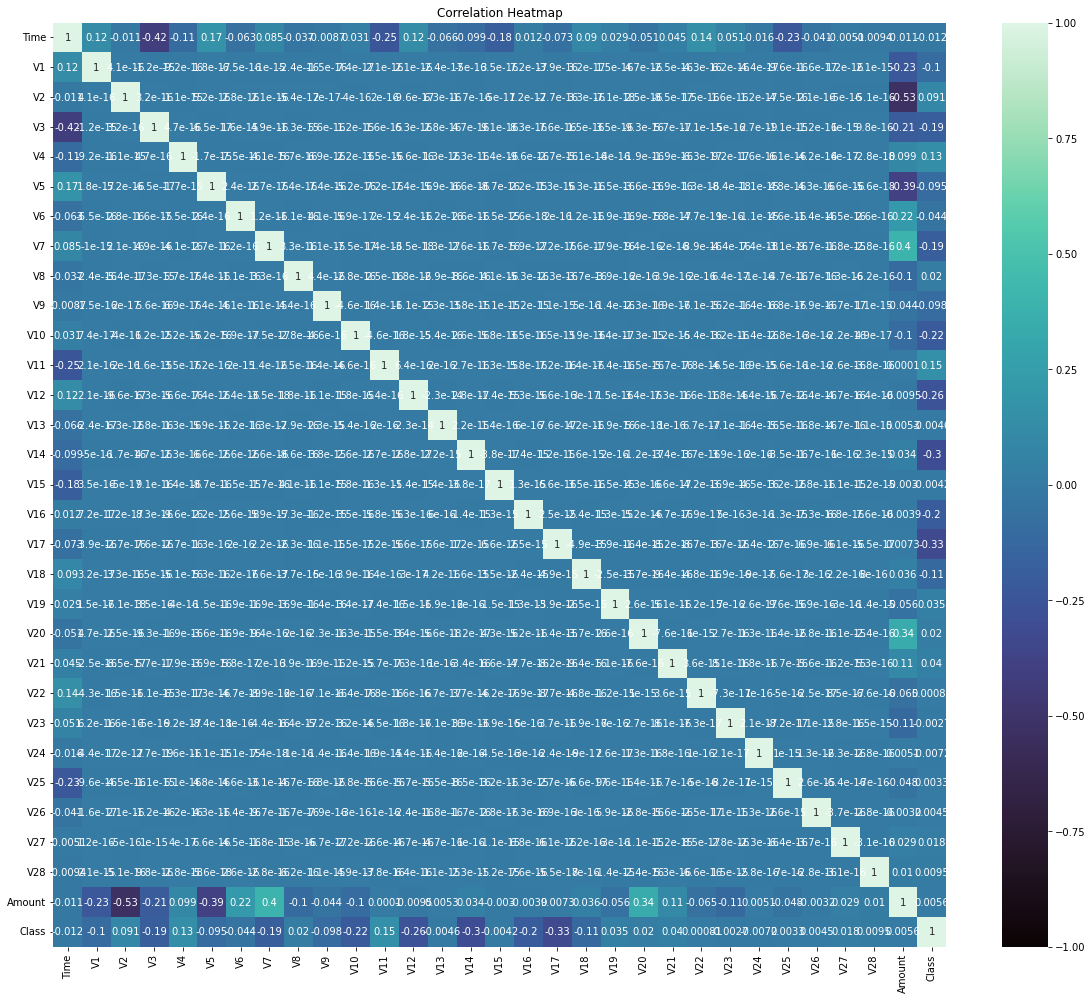

In [9]:
corr = data.corr()

plt.figure(figsize =(20,17))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

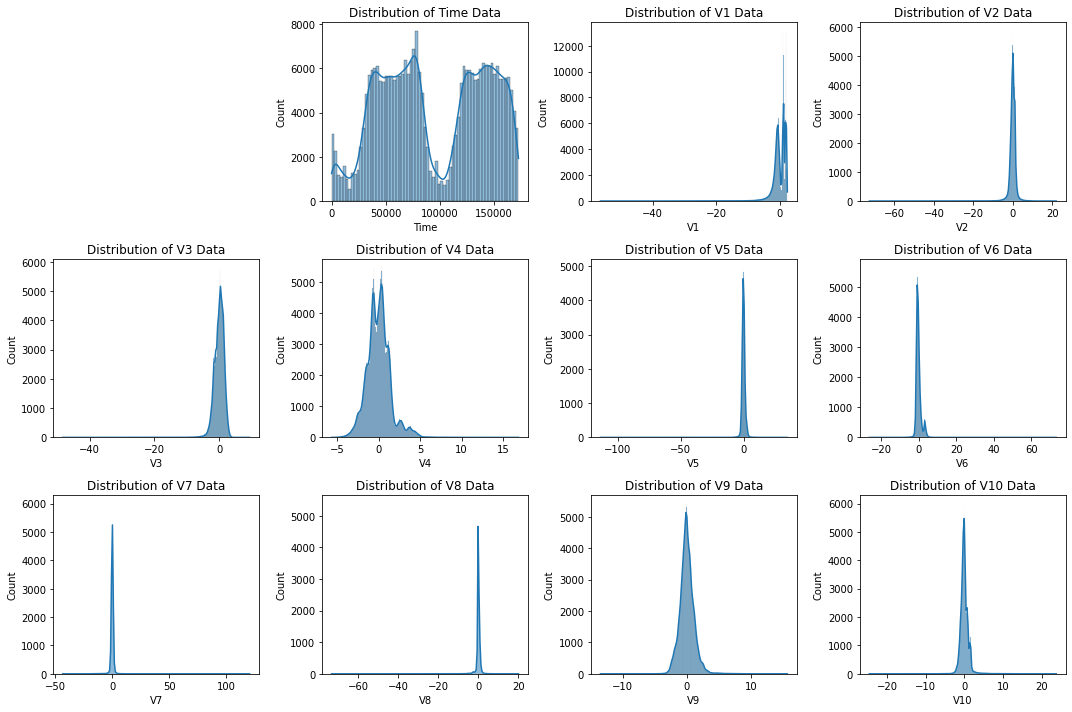

In [10]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data.columns,1):   
    try:
        plt.subplot(3,4,i+1)
        plt.title(f"Distribution of {col} Data")
        sns.histplot(data[col],kde=True)
        plt.tight_layout()
        plt.plot()  
    except ValueError:
        break

<AxesSubplot:ylabel='Class'>

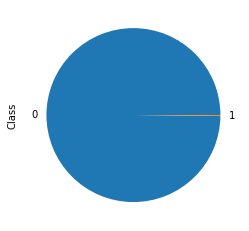

In [11]:
data.Class.value_counts().plot(kind='pie')

# Preprocessing

In [8]:
#data.drop(['Time'], axis=1, inplace=True) #drop id 
y = data['Class'].copy()
X = data.drop('Class', axis=1).copy()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, stratify=y, random_state=42) 
"""Stratification is a sampling technique used to ensure that the proportion of 
different classes in the dataset is preserved in the split between the training and testing sets."""

'Stratification is a sampling technique used to ensure that the proportion of \ndifferent classes in the dataset is preserved in the split between the training and testing sets.'

# Training

In [15]:
models = {
    LogisticRegression(max_iter=500): "   Logistic Regression",
    XGBClassifier():      "        XGBClassifier",
    
}

for model in models.keys():
    model.fit(X_train, y_train)

In [16]:
for model, name in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test)*100))

   Logistic Regression: 99.92%
        XGBClassifier: 99.96%


### Accuracy is not a good evaluation for Imbalance dataset, We need to plot the ROC curve and show the confusion matrix.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199127
           1       0.63      0.88      0.73       238

    accuracy                           1.00    199365
   macro avg       0.81      0.94      0.87    199365
weighted avg       1.00      1.00      1.00    199365



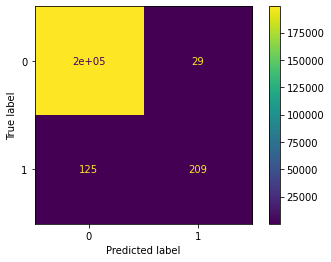

In [17]:
# Confusion Matrix Logistic Regression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
report(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199095
           1       0.77      0.96      0.85       270

    accuracy                           1.00    199365
   macro avg       0.89      0.98      0.93    199365
weighted avg       1.00      1.00      1.00    199365



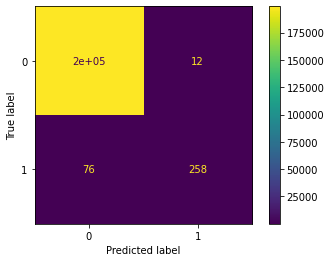

In [18]:
# Confusion Matrix XGBoost
XG = XGBClassifier()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
report(XG)


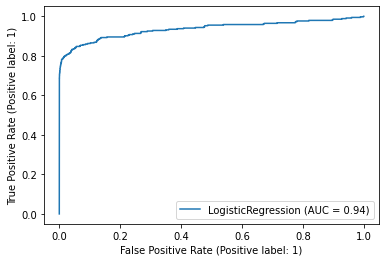

In [19]:
lr_disp = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()

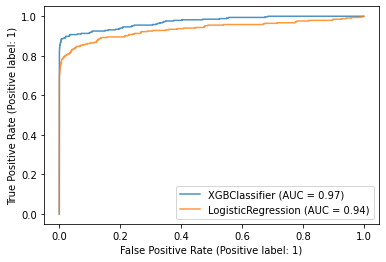

In [20]:
ax = plt.gca()
XG_disp = RocCurveDisplay.from_estimator(XG, X_test, y_test, ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
plt.show()

### In the upcoming sections we'll try to implement some techniques to handle the imbalanced data. We'll know which model will be a good choise based on their metrics.

## After Stratification

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199100
           1       0.63      0.82      0.72       265

    accuracy                           1.00    199365
   macro avg       0.82      0.91      0.86    199365
weighted avg       1.00      1.00      1.00    199365



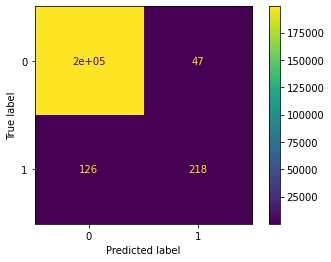

In [23]:
# Confusion Matrix Logistic Regression, Stratify
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
report(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199081
           1       0.76      0.92      0.83       284

    accuracy                           1.00    199365
   macro avg       0.88      0.96      0.92    199365
weighted avg       1.00      1.00      1.00    199365



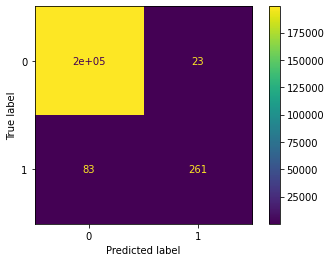

In [25]:
# Confusion Matrix XGBoost, Stratify
XG = XGBClassifier()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
report(XG)

# Sampling the Data 

In [42]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
## first method 
s= SMOTE()
##second method
smt= SMOTETomek()
##Third method
tk= TomekLinks()
X_res, y_res= s.fit_resample(X_train, y_train)
X_res1, y_res1= smt.fit_resample(X_train, y_train)
X_res2, y_res2= tk.fit_resample(X_train, y_train)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99    193559
           1       0.84      0.05      0.09      5806

    accuracy                           0.97    199365
   macro avg       0.91      0.52      0.54    199365
weighted avg       0.97      0.97      0.96    199365



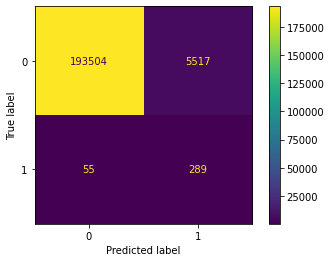

In [27]:
# Confusion Matrix Logistic Regression, Sampling Method: SMOTE
lr = LogisticRegression(max_iter=500)
lr.fit(X_res, y_res)
y_pred_lr = lr.predict(X_test)
report(lr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    196765
           1       0.88      0.12      0.20      2600

    accuracy                           0.99    199365
   macro avg       0.93      0.56      0.60    199365
weighted avg       0.99      0.99      0.98    199365



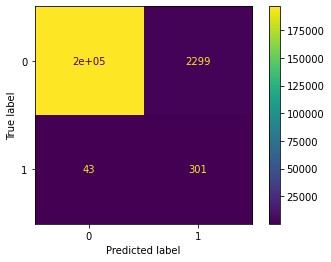

In [28]:
# Confusion Matrix Logistic Regression, Sampling Method: SMOTETomek
lr = LogisticRegression(max_iter=500)
lr.fit(X_res1, y_res1)
y_pred_lr = lr.predict(X_test)
report(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199093
           1       0.65      0.83      0.73       272

    accuracy                           1.00    199365
   macro avg       0.83      0.91      0.87    199365
weighted avg       1.00      1.00      1.00    199365



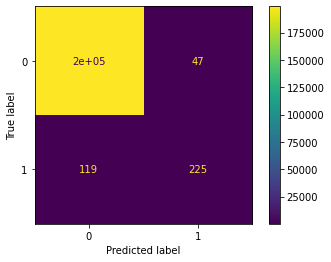

In [29]:
# Confusion Matrix Logistic Regression, Sampling Method: TomekLinks
lr = LogisticRegression(max_iter=500)
lr.fit(X_res2, y_res2)
y_pred_lr = lr.predict(X_test)
report(lr)

### XGBoost with Sampling

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199041
           1       0.80      0.85      0.82       324

    accuracy                           1.00    199365
   macro avg       0.90      0.92      0.91    199365
weighted avg       1.00      1.00      1.00    199365



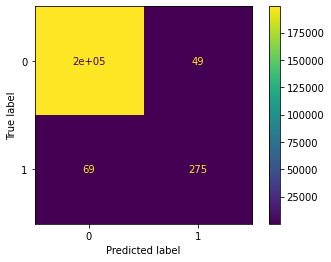

In [30]:
# Confusion Matrix XGBoost, Sampling Method: SMOTE
XG = XGBClassifier()
XG.fit(X_res, y_res)
y_pred = XG.predict(X_test)
report(XG)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199049
           1       0.79      0.86      0.82       316

    accuracy                           1.00    199365
   macro avg       0.90      0.93      0.91    199365
weighted avg       1.00      1.00      1.00    199365



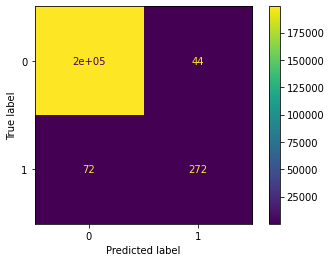

In [31]:
# Confusion Matrix XGBoost, Sampling Method: SMOTETomek
XG = XGBClassifier()
XG.fit(X_res1, y_res1)
y_pred = XG.predict(X_test)
report(XG)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199081
           1       0.77      0.93      0.84       284

    accuracy                           1.00    199365
   macro avg       0.88      0.96      0.92    199365
weighted avg       1.00      1.00      1.00    199365



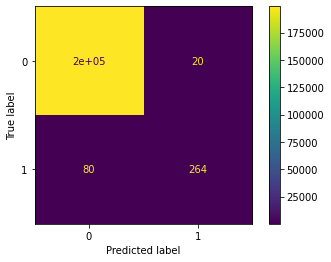

In [32]:
# Confusion Matrix XGBoost, Sampling Method: TomekLinks
XG = XGBClassifier()
XG.fit(X_res2, y_res2)
y_pred = XG.predict(X_test)
report(XG)

# Part 2

### at this point, XGBoost is the better choice compared to Logistic Regression. 
It seems like our first model with XGBoost performs better compared with an f1 score of 81%, we'll try to optimized our model. But before that, we'll run our train test split again wihtout "stratify=y"


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42) 

In [10]:
from collections import Counter
# count examples in each class
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 577.876


In [13]:
XG = XGBClassifier()
# define grid
weights = [1, 10, 50, 99, 100, 577.876]
param_grid = dict(scale_pos_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
# define grid search
grid = GridSearchCV(estimator=XG, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X_train, y_train)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.978991 using {'scale_pos_weight': 1}
0.978991 (0.014874) with: {'scale_pos_weight': 1}
0.978321 (0.019398) with: {'scale_pos_weight': 10}
0.976848 (0.017639) with: {'scale_pos_weight': 50}
0.976853 (0.018155) with: {'scale_pos_weight': 99}
0.975609 (0.020396) with: {'scale_pos_weight': 100}
0.972740 (0.016949) with: {'scale_pos_weight': 577.876}
